In [1]:
import numpy as np 
import pandas as pd 
from numpy import array
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [2]:
original = pd.read_csv('cases.csv')

C:\Users\Yuwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,15,23,43,44,51,53,55,63,67,71,73,74,79,92,107,108,126,127,130,132,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
reversed_index=original.loc[ ( (original['Has Reverse'] == 'Yes') & (original['Has Affirm'].isnull() ))].index#
partial_index=original.loc[ ( (original['Has Reverse']== 'Yes') & (original['Has Affirm']== 'Yes' ))].index#
nan_index=original.loc[ ( (original['Has Reverse'].isnull()) & (original['Has Affirm'].isnull() ))].index#
affirm_index=original.loc[ ( (original['Has Affirm'] == 'Yes') & (original['Has Reverse'].isnull() ))].index# 

In [4]:
new=original[['Case Id','Case Type','Case Name','Decision Date','Lower Ct Judge']]
new['case status']=''


C:\Users\Yuwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
for i in affirm_index:
    new.at[i,'case status']='Affirm'
for i in reversed_index:
    new.at[i,'case status']='Reverse'
for i in partial_index:
    new.at[i,'case status']='Partially'
#delete rows with nan status 
new.drop(nan_index,inplace=True)
new.reset_index(drop=True,inplace=True)

C:\Users\Yuwan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
# delete rows with NAN judge name
drop_nan_jud=new[pd.notnull(new['Lower Ct Judge'])]
drop_nan_jud.reset_index(drop=True,inplace=True)
drop_nan_jud

,Case Id,Case Type,Case Name,Decision Date,Lower Ct Judge,case status
0,2008-P-0001,Civil,PETER G. HILL vs. JAMES LUKOWIAK,12/22/2008,"Bruce R. Henry, J.",Affirm
1,2008-P-1002,Civil,CASELLA WASTE MANAGEMENT OF MA vs. JOHN TAMBURO,05/04/2010,"David A. McLaughlin, J.",Affirm
2,2008-P-1006,Civil,FARMER & FLIER ASSOCIATES vs. GUILFORD TRANSPO...,07/15/2009,"Herman J. Smith, Jr., J.",Affirm
3,2008-P-1007,Civil,B.M. vs. J.C.,05/27/2009,"Judith Nelson Dilday, J.",Affirm
4,2008-P-1014,Civil,SOLANGE DASILVA vs. MICHAEL BERMAN,05/19/2009,"Thayer Fremont-Smith, J.",Affirm
5,2008-P-1019,Civil,EVA MONTANEZ vs. CARDAROPOLI REALTY COMPANY,06/11/2009,"John A. Agostini, J.",Affirm
6,2008-P-1021,Civil,JAMES TRIBBETT vs. KATHLEEN M. DENNEHY & others,06/26/2009,"Frank M. Gaziano, J.",Affirm
7,2008-P-1026,Civil,"ALBERT ZABIN, ESQ. & others vs. STEFANO PICCIO...",03/12/2009,"Kenneth J. Fishman, J.",Affirm
8,2008-P-1027,Civil,JOHN T. HAFFEY vs. HOWARD J. ROCK & another,11/04/2009,"Herman J. Smith, Jr., J.",Affirm
9,2008-P-1029,Civil,PAUL MARIANO vs. JOEL P. SUTTENBERG & another,05/19/2009,"S. Jane Haggerty, J.",Affirm


In [7]:

# analysis every judges reversed ratio, affirmed ratio and partial ratio
#{"x":[reversed_num, affirmed_num, partial_num]}
judge_count = {} 
for i, j in drop_nan_jud.iterrows():
    jud_name=j['Lower Ct Judge']
    status=j['case status']    
    if jud_name not in judge_count:
        if status=='Reverse':
            judge_count[jud_name]=[1,0,0,1]
        elif status=='Affirm':
            judge_count[jud_name]=[0,1,0,1]
        else:
            judge_count[jud_name]=[0,0,1,1]
              
    else:
        if status=='Reverse':
            judge_count[jud_name][0]=judge_count[jud_name][0]+1
            judge_count[jud_name][3]=judge_count[jud_name][3]+1
        elif status=='Affirm':
            judge_count[jud_name][1]=judge_count[jud_name][1]+1
            judge_count[jud_name][3]=judge_count[jud_name][3]+1
        else:
            judge_count[jud_name][2]=judge_count[jud_name][2]+1
            judge_count[jud_name][3]=judge_count[jud_name][3]+1
            
judge_sorted=sorted(judge_count.items(), key=lambda x: x[1][3], reverse=True)   
judge_count_sorted = {}
[judge_count_sorted.update({k:v}) for k,v in judge_sorted]
print(judge_count_sorted)

{'Dennis J. Curran, J.': [5, 86, 3, 94], 'Alexander H. Sands, J.': [5, 57, 5, 67], 'Patrick F. Brady, J.': [5, 57, 5, 67], 'Robert A. Cornetta, J.': [8, 53, 3, 64], 'Thomas R. Murtagh, J.': [4, 52, 6, 62], 'Christopher J. Muse, J.': [6, 50, 4, 60], 'Linda E. Giles, J.': [10, 47, 3, 60], 'Geraldine S. Hines, J.': [5, 50, 2, 57], 'Bonnie H. MacLeod-Mancuso, J.': [4, 50, 2, 56], 'Keith C. Long, J.': [2, 50, 0, 52], 'Janet L. Sanders, J.': [3, 45, 3, 51], 'Peter M. Lauriat, J.': [3, 44, 4, 51], 'Gordon H. Piper, J.': [1, 47, 2, 50], 'John C. Cratsley, J.': [7, 40, 3, 50], 'Timothy Q. Feeley, J.': [3, 43, 4, 50], 'Frances A. McIntyre, J.': [4, 40, 5, 49], 'Bruce R. Henry, J.': [1, 43, 4, 48], 'Charles W. Trombly, J.': [3, 44, 1, 48], 'Elizabeth M. Fahey, J.': [10, 36, 2, 48], 'Douglas H. Wilkins, J.': [2, 43, 1, 46], 'Judith Fabricant, J.': [1, 42, 2, 45], 'Richard T. Moses, J.': [3, 39, 2, 44], 'Thomas P. Billings, J.': [3, 36, 4, 43], 'Thayer Fremont-Smith, J.': [4, 37, 1, 42], 'S. Jane H

In [8]:
#Create Dataframe with columns, name of judge and its statistics in order to graph it
judges_data_10yr = pd.DataFrame.from_dict(judge_count_sorted).transpose()
judges_data_10yr.rename(columns = {0:'Reversed',1:'Affirmed',2:'Partial',3:'Total'}, inplace = True)
judges_data_10yr


,Reversed,Affirmed,Partial,Total
"Dennis J. Curran, J.",5,86,3,94
"Alexander H. Sands, J.",5,57,5,67
"Patrick F. Brady, J.",5,57,5,67
"Robert A. Cornetta, J.",8,53,3,64
"Thomas R. Murtagh, J.",4,52,6,62
"Christopher J. Muse, J.",6,50,4,60
"Linda E. Giles, J.",10,47,3,60
"Geraldine S. Hines, J.",5,50,2,57
"Bonnie H. MacLeod-Mancuso, J.",4,50,2,56
"Keith C. Long, J.",2,50,0,52


In [27]:

def print_stats(judge_count):
    #We're given list of certain judge [number_of_reversed,number_of_affirmed,number_of_partial,total_number_of_cases]
    #Pct reversed:
    per_dic={}
    for i in judge_count.items():
        judge_name=i[0]
        lst=i[1]       
        total=lst[3]
        pct_reversed = round((lst[0]/total)*100,2)
#     #Pct affirmed
        pct_affirmed = round((lst[1]/total)*100,2)
#     #Pct partial
        pct_partial = round((lst[2]/total)*100,2)
        per_dic[judge_name]=[pct_reversed,pct_affirmed,pct_partial,total]
    return per_dic
        #print("Judge {} has {}% of cases reversed, {}% of cases affirmed, and {}% of cases partially affirmed/reversed, total #of cases N= {}".format(judge_name,pct_reversed,pct_affirmed,pct_partial,lst[3]))
judges_data_per = pd.DataFrame.from_dict(print_stats(judge_count_sorted)).transpose()
judges_data_per.rename(columns = {0:'pct_reversed%',1:'pct_affirmed%',2:'pct_partial%',3:'Total'}, inplace = True)
judges_data_per


,pct_reversed%,pct_affirmed%,pct_partial%,Total
"Dennis J. Curran, J.",5.32,91.49,3.19,94.0
"Alexander H. Sands, J.",7.46,85.07,7.46,67.0
"Patrick F. Brady, J.",7.46,85.07,7.46,67.0
"Robert A. Cornetta, J.",12.50,82.81,4.69,64.0
"Thomas R. Murtagh, J.",6.45,83.87,9.68,62.0
"Christopher J. Muse, J.",10.00,83.33,6.67,60.0
"Linda E. Giles, J.",16.67,78.33,5.00,60.0
"Geraldine S. Hines, J.",8.77,87.72,3.51,57.0
"Bonnie H. MacLeod-Mancuso, J.",7.14,89.29,3.57,56.0
"Keith C. Long, J.",3.85,96.15,0.00,52.0


In [28]:
#firnd the judges who has reversed number at least 3 and total number of cases>12
r_sort=judges_data_10yr.sort_values(by='Reversed', ascending=False)
r_top_sort=r_sort.loc[((r_sort['Reversed']>4) & (r_sort['Total']>12)) ]
r_jud=r_top_sort.index.tolist()

In [29]:
#drop_nan_jud.to_csv("10yrs_civil_cases.csv")

In [30]:
#judges_data_per.to_csv("10yrs_civil_cases_pct.csv")

In [31]:
#judges_data_10yr.to_csv("10yrs_jud_descendingorder.csv")

In [32]:
#  reversed_most is sort by reversed number of cases
reversed_most=judges_data_per.loc[ ( judges_data_per['Total'] >12)&(judges_data_per['pct_reversed%'] >8)]
reversed_most.sort_values(by='pct_reversed%', ascending=False,inplace=True)
# find judge who has most pct reversed
pct_most=reversed_most.index.tolist()
reversed_most



C:\Users\Yuwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pct_reversed%,pct_affirmed%,pct_partial%,Total
"Virginia M. Ward, J.",25.00,70.00,5.00,20.0
"John D. Casey, J.",23.53,76.47,0.00,17.0
"Elizabeth M. Fahey, J.",20.83,75.00,4.17,48.0
"Timothy F. Sullivan, J.",20.83,75.00,4.17,24.0
"C. Brian McDonald, J.",18.75,81.25,0.00,16.0
"MaryLou Muirhead, J.",17.65,70.59,11.76,17.0
"Linda E. Giles, J.",16.67,78.33,5.00,60.0
"Shannon Frison, J.",16.67,83.33,0.00,18.0
"Robert J. Kane, J.",16.67,75.00,8.33,36.0
"Richard J. Chin, J.",16.00,84.00,0.00,25.0


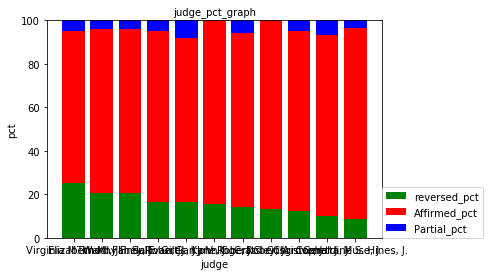

In [33]:
# most is the name of judge who combine both absolute value and pct of reversed cases
most=[]
for i in pct_most:
    if i in r_jud:
        most.append(i)
        
#plot the data 
top_most_reversed=reversed_most.loc[most,:] 
x_data = top_most_reversed.index
y1 = top_most_reversed['pct_reversed%']
y2 =  top_most_reversed['pct_affirmed%']
y3 =  top_most_reversed['pct_partial%']
# y_data =  judges_data_10yr['Total']

plt.bar(x_data, y1, color='green', label='reversed_pct')
plt.bar(x_data, y2, bottom=y1, color='red', label='Affirmed_pct')
plt.bar(x_data, y3, bottom=y1+y2, color='blue', label='Partial_pct')
plt.legend(loc=[1, 0])
plt.title('judge_pct_graph', size = 10)
plt.xlabel('judge', size = 10)
plt.ylabel('pct', size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [34]:
# judges who we should explore more
most

['Virginia M. Ward, J.',
 'Elizabeth M. Fahey, J.',
 'Timothy F. Sullivan, J.',
 'Linda E. Giles, J.',
 'Robert J. Kane, J.',
 'Garry V. Inge, J.',
 'John C. Cratsley, J.',
 'Robert C. Cosgrove, J.',
 'Robert A. Cornetta, J.',
 'Christopher J. Muse, J.',
 'Geraldine S. Hines, J.']